## Read data from firmware

In [1]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [12]:
#Get and arrange data
sourcedata = pd.read_csv("../data/source.csv",header=None,usecols=[0])
backgrounddata = pd.read_csv("../data/out.csv",header=None,usecols=[0])

#change to numpy
sourcedata = sourcedata.values - 200*8192
backgrounddata = backgrounddata.values - 200*8192


#sourcedata = np.subtract(sourcedata,200*8192) 	#subtract the baseline (8192) times the gate value.
#backgrounddata = np.subtract(backgrounddata,200*8192)
#bins = np.arange(min(backgrounddata.min(),sourcedata.min()),max(backgrounddata.max(),sourcedata.max()))

In [13]:
#translate to histogram

Emax = 9000
Emin = 0

Ebins = np.linspace(Emin,Emax,100)
xcq = (Ebins[:-1] + Ebins[1:]) / 2


En,Enx = np.histogram(sourcedata,bins=Ebins)

### Making a Fixed Plot Using Imported Values

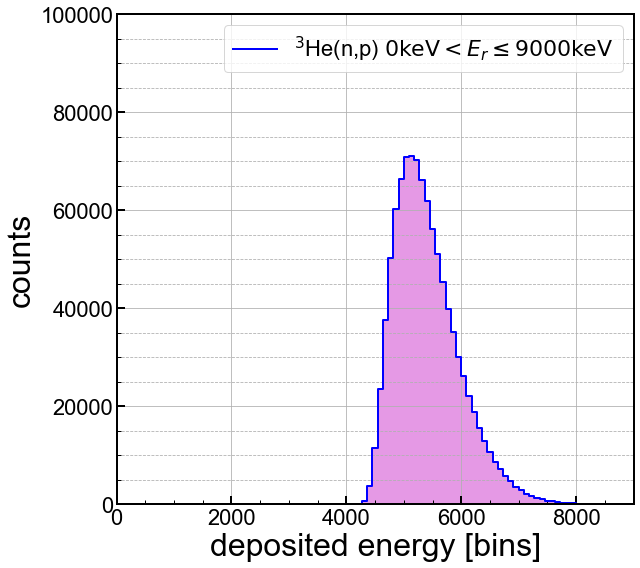

In [16]:
##set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


estring = r'${}\mathrm{{keV}}< E_r \leq {}\mathrm{{keV}}$'.format(Emin,Emax)
ax1.step(xcq,En, where='mid',color='b', linestyle='-', \
            label='$^3$He(n,p) {}'.format(estring), linewidth=2)

ymin = 0.0
ymax = 100000

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),En,step='mid',facecolor='m',alpha=0.4, \
                 label='')

#ax1.axvline(Q,color='k',linestyle='--',linewidth=2,label='Q-value')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Emin, Emax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'deposited energy [bins]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/L3He-Gauss.png')
plt.show()


### Making a Variable Plot Using Randomly Generated Values

In [6]:
#randomly generating data to put in distribution

In [7]:
#plotting using response_function